In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset import train_loader, test_loader
from model import Net
from utils import train, test, train_losses, test_losses, train_acc, test_acc
from wrong_classified import get_incorrect_preds, plot_incorrect_preds

/home/sn/anaconda3/envs/fastai2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified
cuda available? True


In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 34, 34]             512
             ReLU-10           [-1, 16, 34, 34]               0
      BatchNorm2d-11           [-1, 16, 34, 34]              32
          Dropout-12           [-1, 16, 34, 34]               0
        MaxPool2d-13           [-1, 16, 17, 17]               0
           Conv2d-14           [-1

In [4]:
EPOCHS = 20
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=EPOCHS, steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.6563937664031982 Batch_id=390 Accuracy=25.80: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.7145, Accuracy: 3576/10000 (35.76%)

EPOCH: 2


Loss=1.2056820392608643 Batch_id=390 Accuracy=44.38: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 1.3033, Accuracy: 5282/10000 (52.82%)

EPOCH: 3


Loss=1.170982003211975 Batch_id=390 Accuracy=54.81: 100%|█| 391/391 [00:07<00:00



Test set: Average loss: 1.1292, Accuracy: 5947/10000 (59.47%)

EPOCH: 4


Loss=1.1867200136184692 Batch_id=390 Accuracy=60.51: 100%|█| 391/391 [00:10<00:0



Test set: Average loss: 1.0232, Accuracy: 6340/10000 (63.40%)

EPOCH: 5


Loss=1.006082534790039 Batch_id=390 Accuracy=64.04: 100%|█| 391/391 [00:12<00:00



Test set: Average loss: 0.9674, Accuracy: 6597/10000 (65.97%)

EPOCH: 6


Loss=1.1116790771484375 Batch_id=390 Accuracy=66.37: 100%|█| 391/391 [00:13<00:0



Test set: Average loss: 0.8842, Accuracy: 6829/10000 (68.29%)

EPOCH: 7


Loss=0.8161488771438599 Batch_id=390 Accuracy=68.16: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.8249, Accuracy: 7038/10000 (70.38%)

EPOCH: 8


Loss=0.8956467509269714 Batch_id=390 Accuracy=70.05: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.8191, Accuracy: 7138/10000 (71.38%)

EPOCH: 9


Loss=0.8104923367500305 Batch_id=390 Accuracy=71.37: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7719, Accuracy: 7283/10000 (72.83%)

EPOCH: 10


Loss=0.6269803643226624 Batch_id=390 Accuracy=72.69: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7280, Accuracy: 7445/10000 (74.45%)

EPOCH: 11


Loss=0.8262110948562622 Batch_id=390 Accuracy=73.45: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7323, Accuracy: 7435/10000 (74.35%)

EPOCH: 12


Loss=0.8667669296264648 Batch_id=390 Accuracy=74.41: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7057, Accuracy: 7574/10000 (75.74%)

EPOCH: 13


Loss=0.7025312185287476 Batch_id=390 Accuracy=75.37: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6918, Accuracy: 7586/10000 (75.86%)

EPOCH: 14


Loss=0.6288874745368958 Batch_id=390 Accuracy=76.28: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6598, Accuracy: 7711/10000 (77.11%)

EPOCH: 15


Loss=0.5362547636032104 Batch_id=390 Accuracy=76.86: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6538, Accuracy: 7774/10000 (77.74%)

EPOCH: 16


Loss=0.7164396643638611 Batch_id=390 Accuracy=77.43: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6373, Accuracy: 7777/10000 (77.77%)

EPOCH: 17


Loss=0.522383987903595 Batch_id=390 Accuracy=78.26: 100%|█| 391/391 [00:12<00:00



Test set: Average loss: 0.6157, Accuracy: 7872/10000 (78.72%)

EPOCH: 18


Loss=0.5187264084815979 Batch_id=390 Accuracy=78.63: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6101, Accuracy: 7892/10000 (78.92%)

EPOCH: 19


Loss=0.5829076170921326 Batch_id=390 Accuracy=79.32: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6074, Accuracy: 7886/10000 (78.86%)

EPOCH: 20


Loss=0.5820916295051575 Batch_id=390 Accuracy=79.68: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.6079, Accuracy: 7900/10000 (79.00%)



Text(0.5, 1.0, 'Test Accuracy')

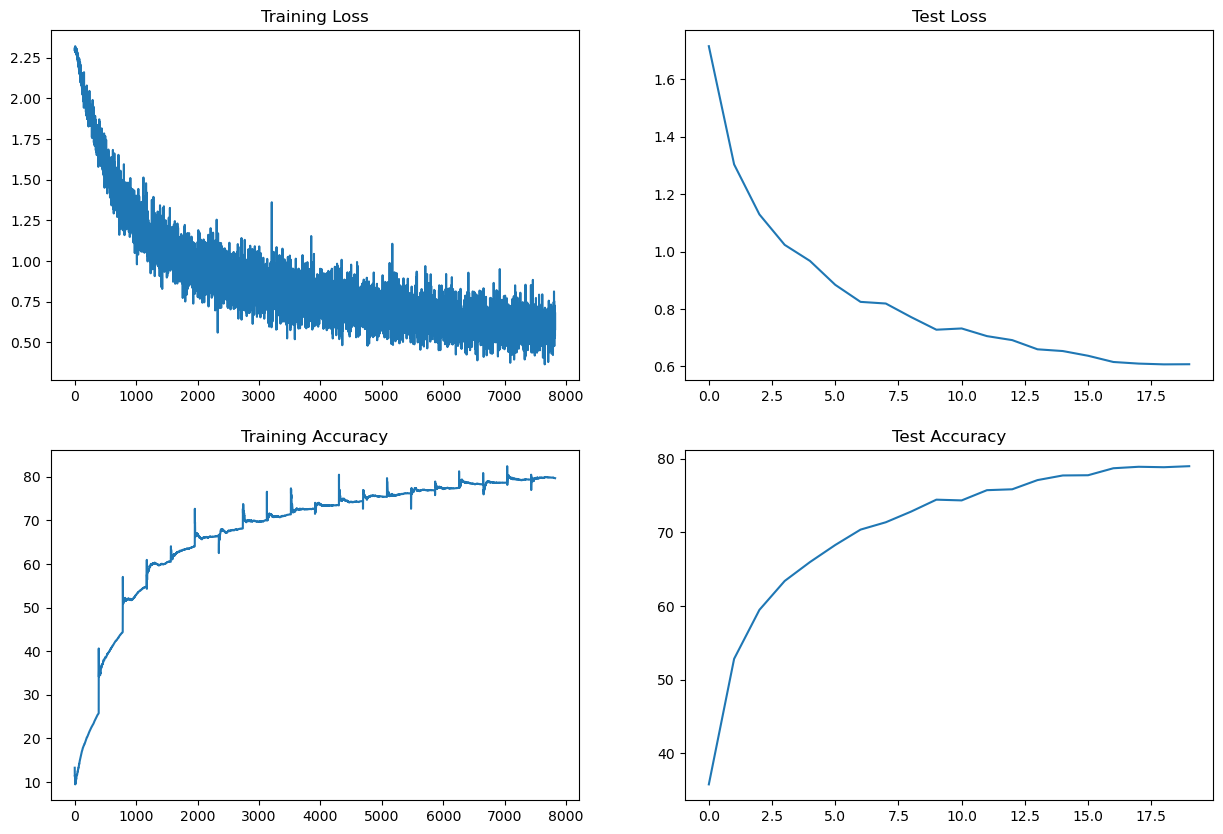

In [5]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Classes in order Actual and Predicted


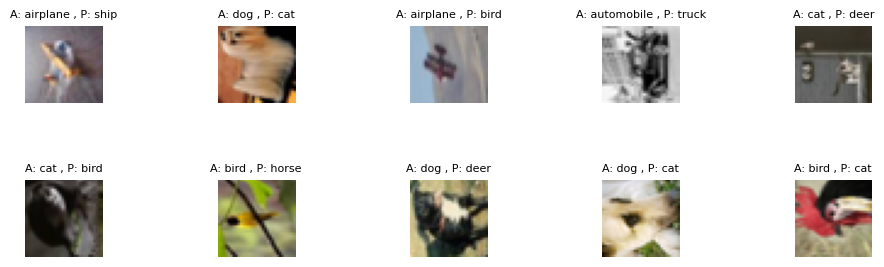

In [6]:
true_wrong, incorrect_examples, pred_wrong = get_incorrect_preds(model, test_loader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)